In [1]:
import numpy as np 
import cv2 as cv

rostro = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [2]:
# Ruta del video o imagen
video_path = 'C:\\devs\\IAProyects\\Proyecto CNN\\dataset\\mclaren3.mp4' 
cap = cv.VideoCapture(video_path)

# Rango de color azul en HSV
lower_blue = np.array([100, 50, 50])  # Límite inferior
upper_blue = np.array([140, 255, 255])  # Límite superior

i = 0

while True:
    # Leer cada frame del video
    ret, frame = cap.read()
    if not ret:  # Si no hay más frames, salir del bucle
        break

    # Convertir de BGR a HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # Crear la máscara para el color azul
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    # Aplicar operaciones morfológicas para limpiar la máscara
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)

    # Encontrar contornos en la máscara
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    # Procesar los contornos detectados
    if contours:
        # Obtener el contorno más grande
        largest_contour = max(contours, key=cv.contourArea)
        
        # Encontrar el centro del contorno usando un círculo mínimo que lo rodee
        ((x, y), radius) = cv.minEnclosingCircle(largest_contour)

        # Verificar que el radio sea válido
        if radius > 10:
            x_start = max(0, int(x - radius))
            y_start = max(0, int(y - radius))
            x_end = min(frame.shape[1], int(x + radius))
            y_end = min(frame.shape[0], int(y + radius))
            
            # Recortar la región de interés (ROI)
            img2 = frame[y_start:y_end, x_start:x_end]
            if img2.size > 0:
                img2 = cv.resize(img2, (50, 50), interpolation=cv.INTER_AREA)
                cv.imwrite(f'C:\\devs\\IAProyects\\Proyecto CNN\\dataset\\mclaren\\imagen_3_{i}.jpg', img2)
                i += 1
                
                # Mostrar la región de interés
                cv.imshow('ROI', img2)

    # Mostrar el frame original y la máscara
    cv.imshow('Frame', frame)
    cv.imshow('Mask', mask)

    # Salir al presionar 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar el video y cerrar las ventanas
cap.release()
cv.destroyAllWindows()



In [ ]:
def escala(imx, escala):
    width = int(imx.shape[1] * escala / 100)
    height = int(imx.shape[0] * escala / 100)
    size = (width, height)
    im = cv.resize(imx, size, interpolation = cv.INTER_AREA)
    return im

In [76]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [77]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [78]:
dirname = os.path.join(os.getcwd(),'C:\\devs\\IAProyects\\Proyecto CNN\\dataset')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ferco\AppData\Local\Temp\ipykernel_94984\820216845.py:14: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  C:\devs\IAProyects\Proyecto CNN\dataset\
C:\devs\IAProyects\Proyecto CNN\dataset\ferrari 1
C:\devs\IAProyects\Proyecto CNN\dataset\hummer 44334
C:\devs\IAProyects\Proyecto CNN\dataset\mclaren 44088
C:\devs\IAProyects\Proyecto CNN\dataset\porsche 43740
C:\devs\IAProyects\Proyecto CNN\dataset\vocho 44802
Directorios leidos: 5
Imagenes en cada directorio [44335, 44088, 43740, 44802, 43757]
suma Total de imagenes en subdirs: 220722


In [84]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Etiquetas creadas: ",len(labels))

Etiquetas creadas:  220722


In [85]:
cars=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    cars.append(name[len(name)-1])
    indice=indice+1

0 ferrari
1 hummer
2 mclaren
3 porsche
4 vocho


In [86]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [87]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (176577, 50, 50, 3) (176577,)
Testing data shape :  (44145, 50, 50, 3) (44145,)


Text(0.5, 1.0, 'Ground Truth : 4')

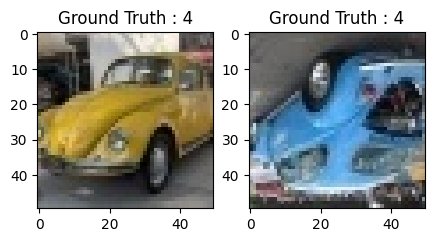

In [88]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

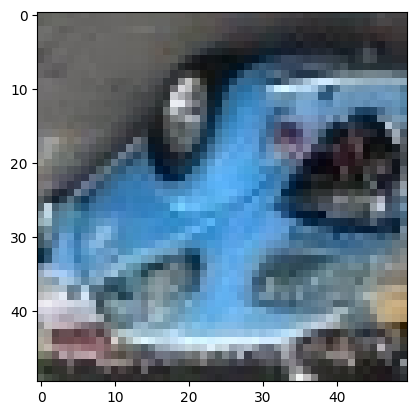

In [89]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [90]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


In [91]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(141261, 50, 50, 3) (35316, 50, 50, 3) (141261, 5) (35316, 5)


In [92]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [93]:
car_model = Sequential()
car_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,3)))
car_model.add(LeakyReLU(alpha=0.1))
car_model.add(MaxPooling2D((2, 2),padding='same'))
car_model.add(Dropout(0.5))


car_model.add(Flatten())
car_model.add(Dense(32, activation='linear'))
car_model.add(LeakyReLU(alpha=0.1))
car_model.add(Dropout(0.5))
car_model.add(Dense(nClasses, activation='softmax'))


In [94]:
car_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 50, 50, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 20000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │         640,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641,093 (2.45 MB)

 Trainable params: 641,093 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
car_model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),
    metrics=['accuracy']
)

In [96]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# Entrenamiento del modelo
car_train = car_model.fit(
    train_X, 
    train_label, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    validation_data=(valid_X, valid_label)
)

Epoch 1/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 60s 26ms/step - accuracy: 0.2488 - loss: 1.5864 - val_accuracy: 0.4509 - val_loss: 1.4108
Epoch 2/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.3976 - loss: 1.4275 - val_accuracy: 0.5446 - val_loss: 1.2768
Epoch 3/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.4658 - loss: 1.3184 - val_accuracy: 0.5687 - val_loss: 1.1662
Epoch 4/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.5065 - loss: 1.2338 - val_accuracy: 0.6132 - val_loss: 1.0797
Epoch 5/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.5412 - loss: 1.1604 - val_accuracy: 0.6377 - val_loss: 1.0074
Epoch 6/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.5681 - loss: 1.1031 - val_accuracy: 0.6724 - val_loss: 0.9412
Epoch 7/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.5908 - loss: 1.0537 - val_accuracy: 0.6890 - val_loss: 0.8853
Epoch 8/50
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.6134 -

In [97]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
car_model.save("C:\\devs\\IAProyects\\Proyecto CNN\\autos_modelos.h5")

In [98]:
test_eval = car_model.evaluate(test_X, test_Y_one_hot, verbose=1)

1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9409 - loss: 0.2030


In [99]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.19965358078479767
Test accuracy: 0.9405595064163208


In [100]:
car_train.history

{'accuracy': [0.2943558394908905,
  0.41756749153137207,
  0.47661420702934265,
  0.5162500739097595,
  0.5485094785690308,
  0.5751906037330627,
  0.5972349047660828,
  0.6164546608924866,
  0.6348885893821716,
  0.6507599353790283,
  0.6651375889778137,
  0.6781560182571411,
  0.6905586123466492,
  0.701269268989563,
  0.7111021280288696,
  0.7220110297203064,
  0.7311572432518005,
  0.7383920550346375,
  0.7457897067070007,
  0.754673957824707,
  0.7601673603057861,
  0.769065797328949,
  0.7719398736953735,
  0.7781907320022583,
  0.7843565940856934,
  0.7882501482963562,
  0.7935099005699158,
  0.7965397238731384,
  0.8027339577674866,
  0.806089460849762,
  0.8103652000427246,
  0.8147117495536804,
  0.8182796239852905,
  0.8207431435585022,
  0.8262719511985779,
  0.8287920951843262,
  0.8313193321228027,
  0.8330962061882019,
  0.8367560505867004,
  0.8388444185256958,
  0.8411734104156494,
  0.8456969857215881,
  0.8478348851203918,
  0.8487834334373474,
  0.8527194261550903,


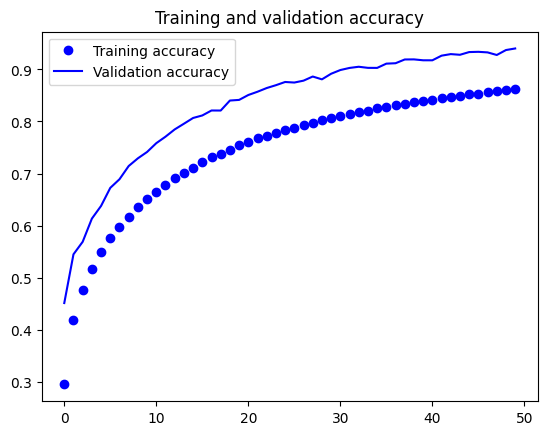

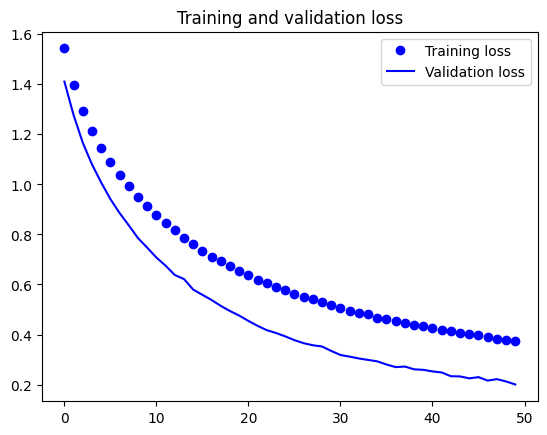

In [101]:
accuracy = car_train.history['accuracy']
val_accuracy = car_train.history['val_accuracy']
loss = car_train.history['loss']
val_loss = car_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [102]:
predicted_classes2 = car_model.predict(test_X)

1380/1380 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [103]:
predicted_classes=[]
for predicted_car in predicted_classes2:
    predicted_classes.append(predicted_car.tolist().index(max(predicted_car)))
predicted_classes=np.array(predicted_classes)

In [104]:
predicted_classes.shape, test_Y.shape

((44145,), (44145,))

Found 41521 correct labels


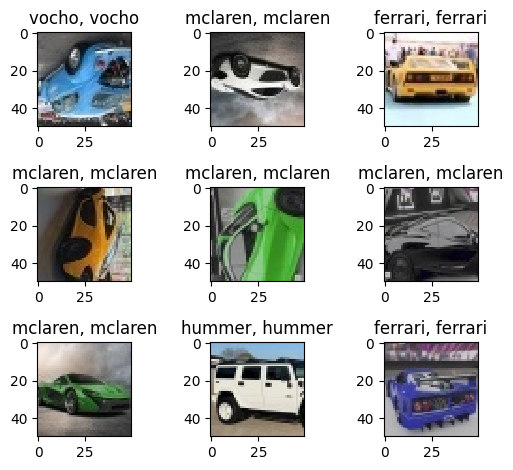

In [105]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50, 50, 3), interpolation='none')
    plt.title("{}, {}".format(cars[predicted_classes[correct]],
                                                   cars[test_Y[correct]]))

    plt.tight_layout()
plt.show()

Found 2624 incorrect labels


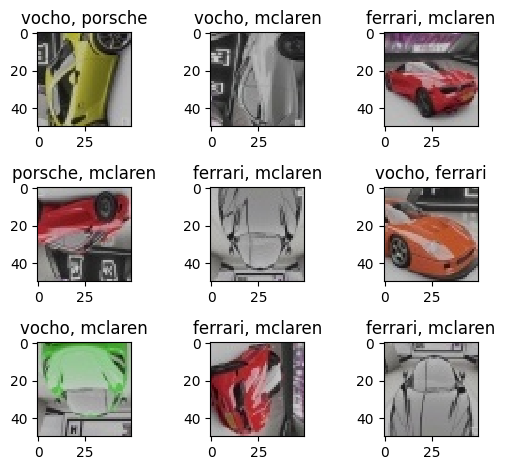

In [106]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(cars[predicted_classes[incorrect]],
                                                    cars[test_Y[incorrect]]))
    plt.tight_layout()

In [107]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.90      0.97      0.93      8976
     Class 1       0.98      0.99      0.98      8699
     Class 2       0.96      0.85      0.90      8757
     Class 3       0.92      0.93      0.92      8870
     Class 4       0.95      0.97      0.96      8843

    accuracy                           0.94     44145
   macro avg       0.94      0.94      0.94     44145
weighted avg       0.94      0.94      0.94     44145



In [119]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:\\devs\\IAProyects\\Proyecto CNN\\Imagenes prueba\\mclaren2.jpeg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (50, 50),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = car_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], cars[img_tagged.tolist().index(max(img_tagged))])

predicted_classes = np.argmax(predicted_classes, axis=1)

# Mostrar resultados y abrir la imagen con el texto de predicción
for i, img_tagged in enumerate(predicted_classes):
    # Obtener el nombre de la clase predicha
    pred_class = cars[img_tagged]

    # Cargar la imagen original en color
    img_color = cv.imread(filepath)
    if img_color is None:
        print(f"Error: no se pudo cargar la imagen {filepath}")
    else:
        # Redimensionar la imagen a su tamaño original
        img_color = cv.resize(img_color, (500, 500))

        # Dibujar el texto de predicción en la imagen
        cv.putText(img_color, f"El carro es: {pred_class}", (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Mostrar la imagen con el texto de predicción
        cv.imshow(filenames[i], img_color)
        cv.waitKey(0)
        cv.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
C:\devs\IAProyects\Proyecto CNN\Imagenes prueba\mclaren2.jpeg hummer
